In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [3]:
all_matches = matches[(matches['team1'].isin(['Sunrisers Hyderabad', 'Delhi Capitals'])) & (matches['team2'].isin(['Sunrisers Hyderabad', 'Delhi Capitals']))]

In [4]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [5]:
sub_data = data[(data['team1'].isin(['Sunrisers Hyderabad', 'Delhi Capitals'])) & (data['team2'].isin(['Sunrisers Hyderabad', 'Delhi Capitals']))]

### Who will win the match??

In [6]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,4/19/2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,5/2/2017,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
393,394,2013,Delhi,4/12/2013,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,5/4/2013,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
468,469,2014,NaN,4/25/2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN


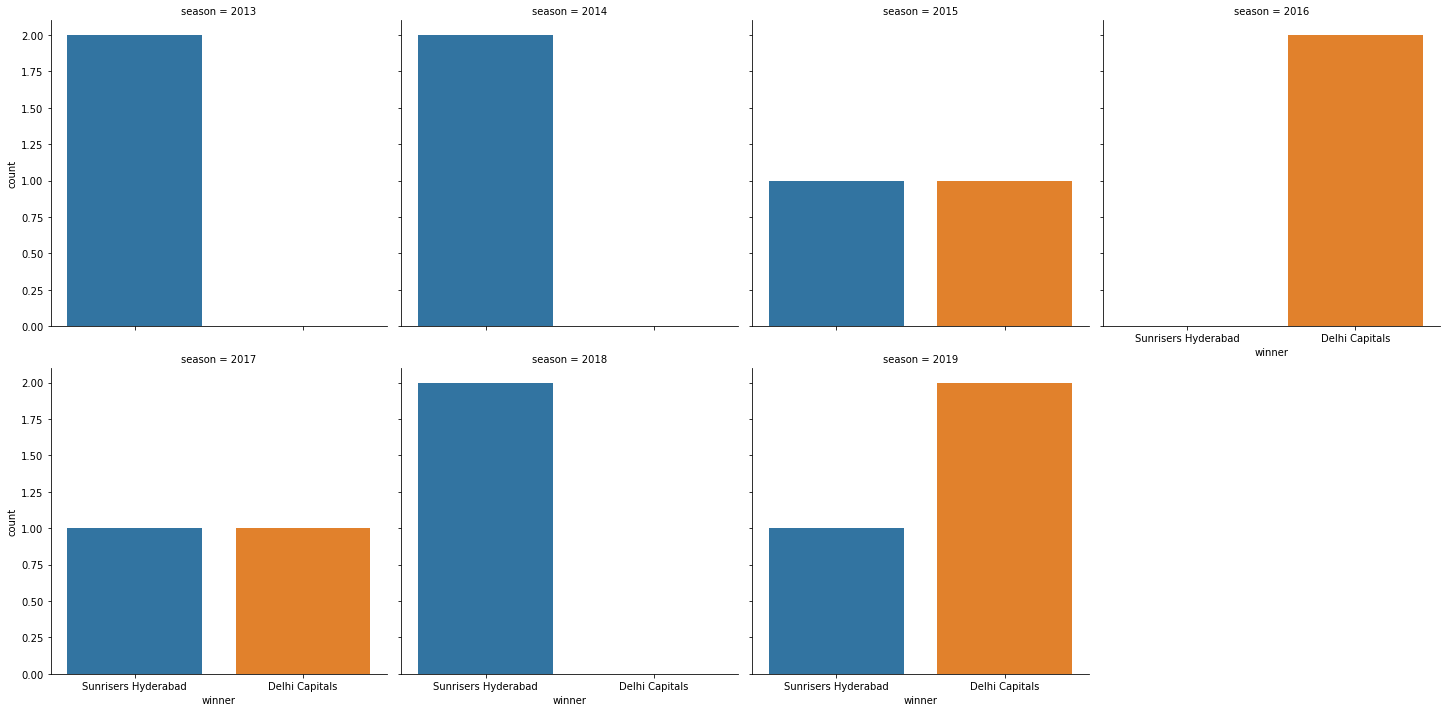

In [7]:
sns.catplot(x='winner', col='season', data=all_matches, kind='count', col_wrap=4)

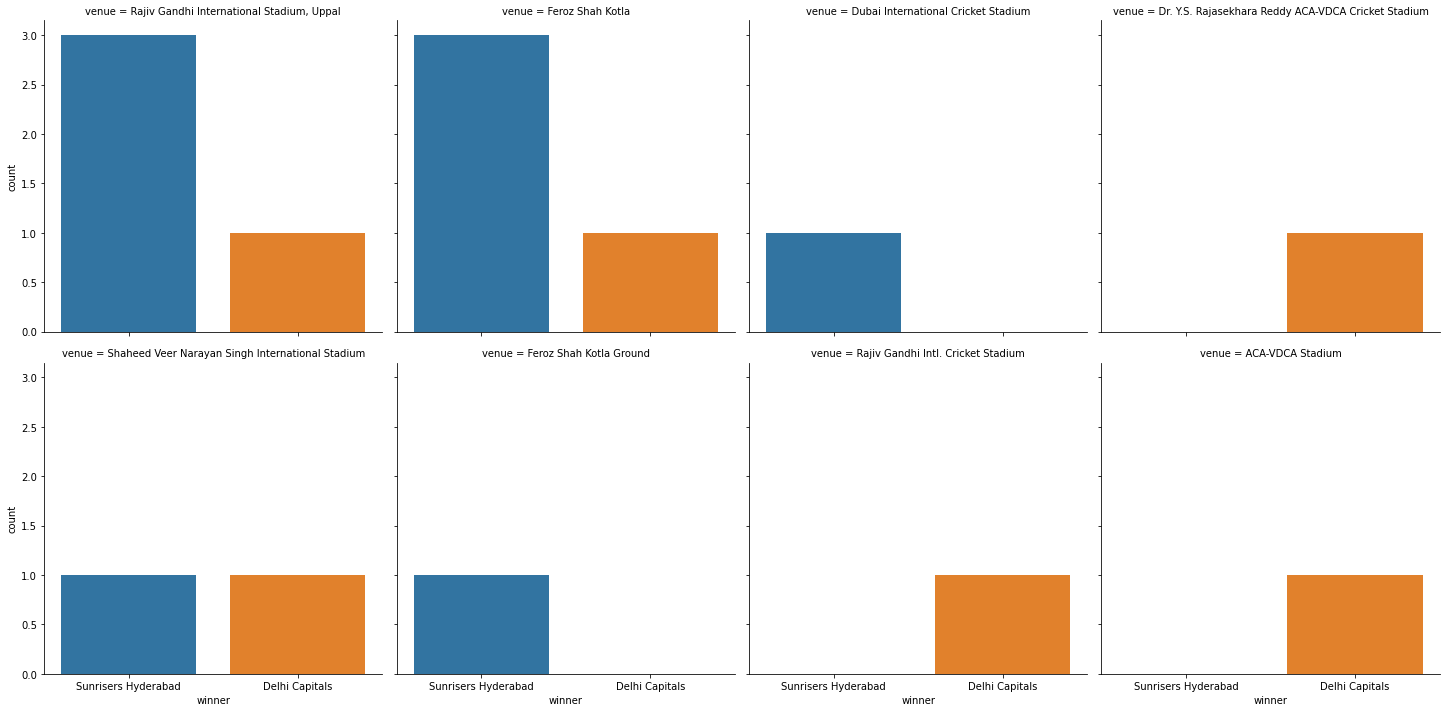

In [8]:
sns.catplot(x='winner', col='venue', data=all_matches, kind='count', col_wrap=4)

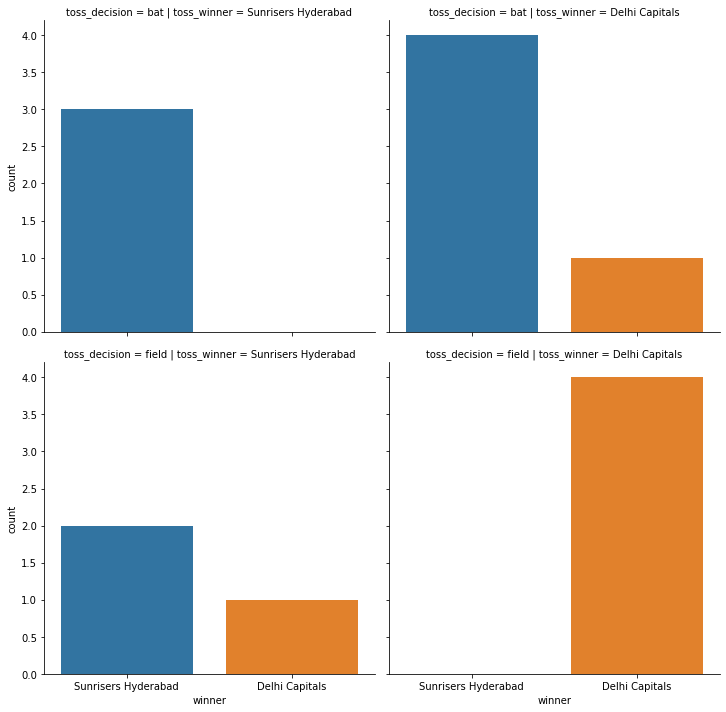

In [9]:
sns.catplot(x='winner', col = 'toss_winner',row='toss_decision', data=all_matches, kind='count')

In [10]:
all_matches.groupby(['id', 'winner'])['player_of_match'].unique()

id     winner             
21     Sunrisers Hyderabad     [KS Williamson]
39     Delhi Capitals         [Mohammed Shami]
394    Sunrisers Hyderabad          [A Mishra]
428    Sunrisers Hyderabad         [DJG Sammy]
469    Sunrisers Hyderabad          [AJ Finch]
489    Sunrisers Hyderabad          [DW Steyn]
531    Delhi Capitals              [JP Duminy]
561    Sunrisers Hyderabad      [MC Henriques]
618    Delhi Capitals              [CH Morris]
628    Delhi Capitals                [KK Nair]
7929   Sunrisers Hyderabad       [Rashid Khan]
7935   Sunrisers Hyderabad          [S Dhawan]
11152  Sunrisers Hyderabad        [J Bairstow]
11321  Delhi Capitals                 [K Paul]
11413  Delhi Capitals                [RR Pant]
Name: player_of_match, dtype: object

In [11]:
sub_data1 = sub_data[sub_data['player_of_match'].isin(['J Bairstow', 'RR Pant', 'S Dhawan', 'Rashid Khan']) & (sub_data['batsman'].isin(['J Bairstow', 'RR Pant', 'S Dhawan', 'Rashid Khan'])) & (sub_data['bowler'].isin(['J Bairstow', 'RR Pant', 'S Dhawan', 'Rashid Khan']))]

In [12]:
sub_data1.groupby('batsman')['batsman_runs'].sum()

batsman
RR Pant     33
S Dhawan     1
Name: batsman_runs, dtype: int64

In [13]:
sub_data1.groupby('bowler')['player_dismissed'].count()

bowler
Rashid Khan    2
Name: player_dismissed, dtype: int64

In [14]:
all_matches.groupby(['season', 'id'])['win_by_wickets', 'win_by_runs'].max()

win_by_wickets  win_by_runs
season id                                
2013   394                 3            0
       428                 6            0
2014   469                 0            4
       489                 8            0
2015   531                 0            4
       561                 0            6
2016   618                 7            0
       628                 6            0
2017   21                  0           15
       39                  6            0
2018   7929                7            0
       7935                9            0
2019   11152               5            0
       11321               0           39
       11413               2            0

### How many runs will be scored totally in the match??

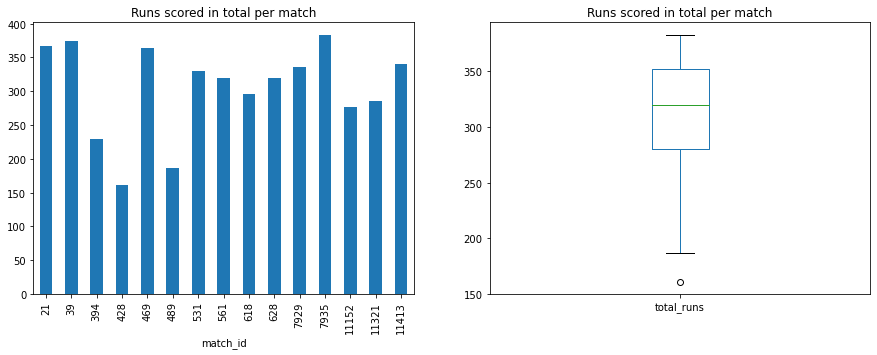

In [15]:
plt.subplot(1, 2, 1)
sub_data.groupby('match_id')['total_runs'].sum().plot.bar(title='Runs scored in total per match', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data.groupby('match_id')['total_runs'].sum().plot.box(title='Runs scored in total per match')

In [16]:
sub_data.groupby(['match_id', 'batting_team'])['total_runs'].sum().groupby('batting_team').mean()

batting_team
Delhi Capitals         156.066667
Sunrisers Hyderabad    148.466667
Name: total_runs, dtype: float64

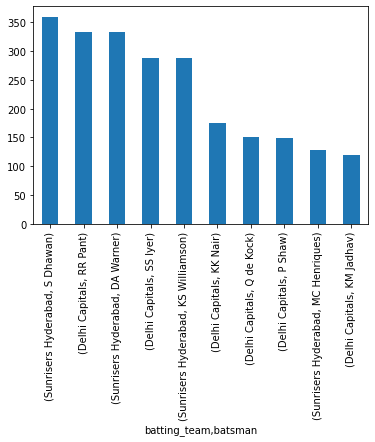

In [17]:
sub_data.groupby(['batting_team', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar()

In [18]:
sub_data[sub_data['batsman'].isin(['S Dhawan', 'RR Pant', 'DA Warner', 'SS Iyer', 'KS Willliamson'])].groupby([ 'batsman'])['batsman_runs'].sum()

batsman
DA Warner    341
RR Pant      333
S Dhawan     398
SS Iyer      289
Name: batsman_runs, dtype: int64

#######

In [19]:
sub_data2 = sub_data[sub_data['dismissal_kind'].isin(['caught', 'caught and bowled'])]

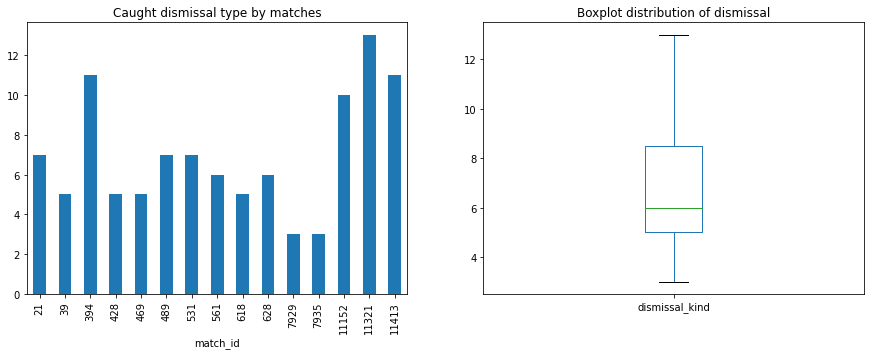

In [20]:
plt.subplot(1, 2, 1)
sub_data2.groupby('match_id')['dismissal_kind'].count().plot.bar(title='Caught dismissal type by matches', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data2.groupby('match_id')['dismissal_kind'].count().plot.box(title='Boxplot distribution of dismissal')

In [21]:
sub_data2.groupby(['bowler'])['dismissal_kind'].value_counts().sort_values(ascending=False).head(10)

bowler           dismissal_kind
A Mishra         caught            7
B Kumar          caught            7
K Paul           caught            6
S Kaul           caught            6
K Ahmed          caught            5
DW Steyn         caught            5
NM Coulter-Nile  caught            5
CH Morris        caught            5
K Rabada         caught            4
I Sharma         caught            4
Name: dismissal_kind, dtype: int64

In [22]:
sub_data2.groupby(['batsman', 'bowler'])['dismissal_kind'].value_counts().sort_values(ascending=False).head(12)

batsman        bowler           dismissal_kind
KV Sharma      NM Coulter-Nile  caught            2
S Dhawan       A Mishra         caught            2
KC Sangakkara  J Botha          caught            2
SV Samson      Mohammed Siraj   caught            2
P Shaw         K Ahmed          caught            2
DA Warner      K Rabada         caught            2
SS Iyer        B Kumar          caught            2
Yuvraj Singh   Parvez Rasool    caught            1
KK Nair        S Kaul           caught            1
J Botha        NLTC Perera      caught            1
JJ Roy         Shakib Al Hasan  caught            1
JP Duminy      BB Sran          caught            1
Name: dismissal_kind, dtype: int64

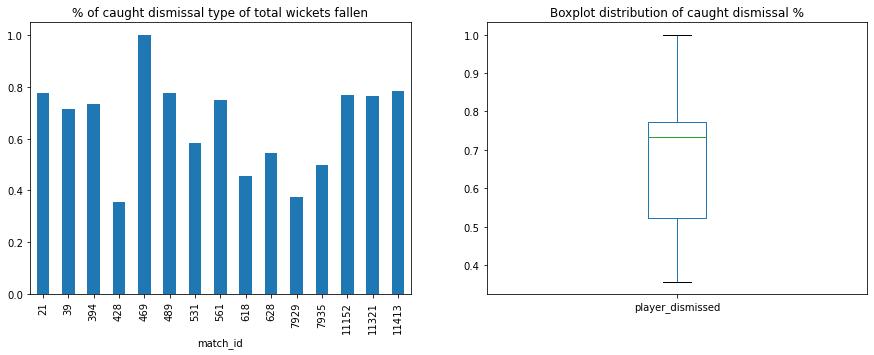

In [23]:
plt.subplot(1, 2, 1)
(sub_data2.groupby('match_id')['player_dismissed'].count()/sub_data.groupby('match_id')['player_dismissed'].count()).plot.bar(title='% of caught dismissal type of total wickets fallen', figsize=(15,5))

plt.subplot(1, 2, 2)
(sub_data2.groupby('match_id')['player_dismissed'].count()/sub_data.groupby('match_id')['player_dismissed'].count()).plot.box(title='Boxplot distribution of caught dismissal %')

In [24]:
sub_data.groupby('match_id')['player_dismissed'].count().describe()

count    15.00000
mean     10.60000
std       3.54159
min       5.00000
25%       8.00000
50%      11.00000
75%      13.50000
max      17.00000
Name: player_dismissed, dtype: float64

In [25]:
(11*75)/100

8.25

### How many more or less SRH will score in the first six overs as compared to DC??

In [32]:
sub_data3 = sub_data[sub_data['over'].isin([1, 2, 3, 4, 5, 6])]

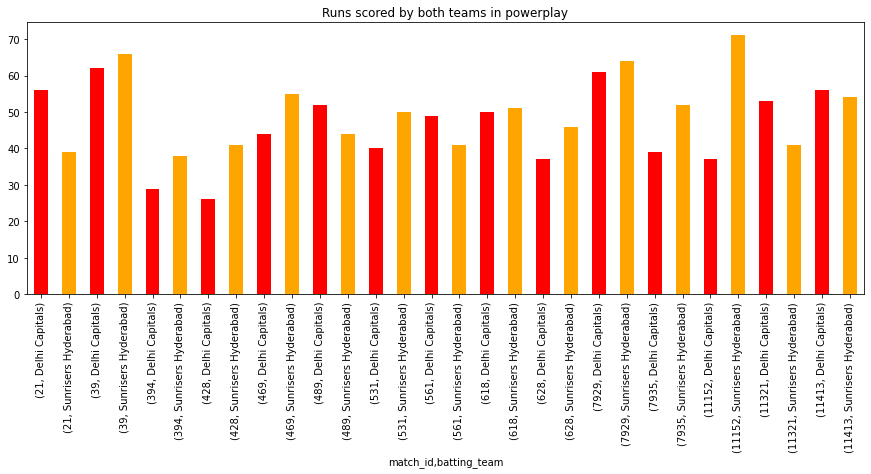

In [36]:
sub_data3.groupby(['match_id', 'batting_team'])['total_runs'].sum().plot.bar(title='Runs scored by both teams in powerplay', color=['Red', 'Orange'], figsize=(15,5))

In [45]:
sub_data3.groupby(['match_id', 'batting_team'])['total_runs'].sum().groupby(['batting_team']).describe()

,count,mean,std,min,25%,50%,75%,max
batting_team,,,,,,,,
Delhi Capitals,15.0,46.066667,11.119267,26.0,38.0,49.0,54.5,62.0
Sunrisers Hyderabad,15.0,50.200000,10.345461,38.0,41.0,50.0,54.5,71.0


In [48]:
sub_data3.groupby(['match_id', 'batting_team'])['player_dismissed'].count().groupby('batting_team').describe()

,count,mean,std,min,25%,50%,75%,max
batting_team,,,,,,,,
Delhi Capitals,15.0,1.2,0.774597,0.0,1.0,1.0,1.5,3.0
Sunrisers Hyderabad,15.0,0.8,0.774597,0.0,0.0,1.0,1.0,2.0


In [55]:
sub_data3[sub_data3['season']>2015].groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(8)

batsman
S Dhawan      149
DA Warner     125
P Shaw        113
KK Nair        88
J Bairstow     79
A Hales        57
SV Samson      42
MJ Guptill     35
Name: batsman_runs, dtype: int64

In [58]:
sub_data3[sub_data3['batsman'].isin(['S Dhawan', 'DA Warner', 'P Shaw', 'J Bairstow'])].groupby('bowler')['player_dismissed'].value_counts()

bowler           player_dismissed
B Kumar          P Shaw              1
CH Morris        DA Warner           1
CR Brathwaite    S Dhawan            1
DW Steyn         DA Warner           1
J Botha          S Dhawan            1
K Ahmed          P Shaw              1
                 S Dhawan            1
Mohammad Nabi    S Dhawan            1
Mohammed Shami   DA Warner           1
NM Coulter-Nile  DA Warner           1
S Kaul           S Dhawan            1
Sandeep Sharma   GJ Maxwell          1
Shakib Al Hasan  P Shaw              1
Z Khan           S Dhawan            1
Name: player_dismissed, dtype: int64

In [62]:
sub_data3[(sub_data3['batsman'].isin(['DA Warner', 'J Bairstow'])) & (sub_data3['non_striker'].isin(['DA Warner', 'J Bairstow']))].groupby(['match_id'])['batsman_runs'].sum()

match_id
11152    62
11321    40
Name: batsman_runs, dtype: int64

In [63]:
sub_data3[(sub_data3['batsman'].isin(['P Shaw', 'S Dhawan'])) & (sub_data3['non_striker'].isin(['P Shaw', 'S Dhawan']))].groupby(['match_id'])['batsman_runs'].sum()

match_id
11152    14
11321    11
11413    55
Name: batsman_runs, dtype: int64

In [67]:
((sub_data3.groupby(['match_id', 'batting_team'])['total_runs'].sum()/sub_data3.groupby(['match_id', 'batting_team'])['ball'].count())*100).groupby('batting_team').describe()

,count,mean,std,min,25%,50%,75%,max
batting_team,,,,,,,,
Delhi Capitals,15.0,124.787636,31.206361,70.270270,102.670940,135.135135,147.297297,172.222222
Sunrisers Hyderabad,15.0,137.857963,28.026107,102.702703,110.810811,137.837838,148.333333,191.891892


In [73]:
sub_data4 = sub_data3[sub_data3['batsman'].isin(['S Dhawan', 'DA Warner', 'P Shaw', 'J Bairstow'])]

In [77]:
((sub_data4.groupby(['match_id', 'batsman'])['batsman_runs'].sum()/sub_data4.groupby(['match_id', 'batsman'])['ball'].count())*100).groupby('batsman').describe()

,count,mean,std,min,25%,50%,75%,max
batsman,,,,,,,,
DA Warner,10.0,101.546470,49.129395,0.000000,76.893939,107.670455,137.142857,168.421053
J Bairstow,2.0,171.052632,40.937761,142.105263,156.578947,171.052632,185.526316,200.000000
P Shaw,5.0,125.196970,54.787856,80.000000,81.818182,100.000000,160.000000,204.166667
S Dhawan,14.0,123.634018,42.094149,50.000000,96.113445,125.000000,137.500000,207.692308


### How many extras will be bowled in total during the match by both teams? Consider all extras-byes, leg-byes, no balls, wides, and penalties too.

In [88]:
sub_data5 = sub_data[sub_data['batsman_runs']==0]

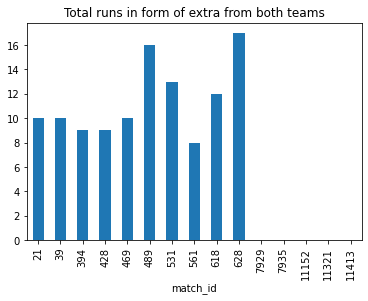

In [91]:
sub_data5.groupby('match_id')['extra_runs'].sum().plot.bar(title='Total runs in form of extra from both teams')

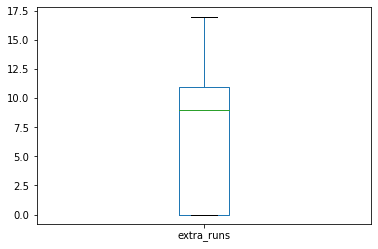

In [141]:
sub_data5.groupby('match_id')['extra_runs'].sum().plot.box()

In [92]:
sub_data5.groupby('bowling_team')['extra_runs'].sum()

bowling_team
Delhi Capitals         52
Sunrisers Hyderabad    62
Name: extra_runs, dtype: int64

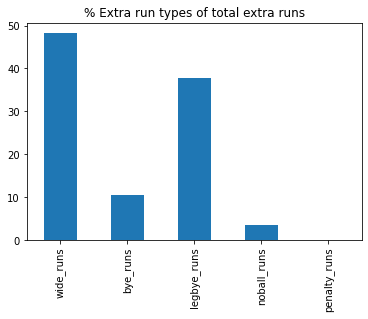

In [100]:
((sub_data5[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum()/sub_data5['extra_runs'].sum())*100).plot.bar(title='% Extra run types of total extra runs')

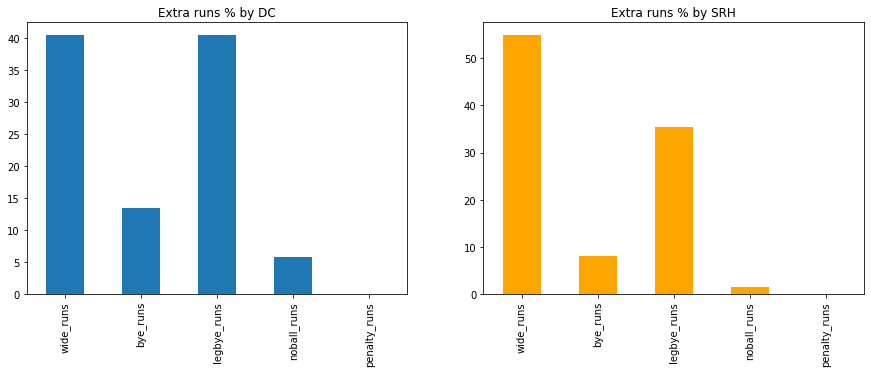

In [116]:
plt.subplot(1, 2, 1)
((sub_data5[sub_data5['bowling_team']=='Delhi Capitals'][['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum()/sub_data5[sub_data5['bowling_team']=='Delhi Capitals']['extra_runs'].sum())*100).plot.bar(title='Extra runs % by DC', figsize=(15,5))

plt.subplot(1, 2, 2)
((sub_data5[sub_data5['bowling_team']=='Sunrisers Hyderabad'][['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum()/sub_data5[sub_data5['bowling_team']=='Sunrisers Hyderabad']['extra_runs'].sum())*100).plot.bar(title='Extra runs % by SRH', figsize=(15,5), color=['orange'])

In [125]:
sub_data5[sub_data5['season']>2015].groupby('bowler')[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum().sort_values(by =['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'] , ascending=False).head(10)

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs
bowler,,,,,
B Kumar,10,1,5,0,0
Mustafizur Rahman,3,0,0,0,0
MC Henriques,2,0,0,0,0
Mohammed Shami,1,0,6,0,0
J Yadav,1,0,1,0,0
A Mishra,1,0,0,0,0
AD Mathews,1,0,0,0,0
BB Sran,1,0,0,0,0
CH Morris,1,0,0,0,0


In [126]:
sub_data5[sub_data5['season']>2015].groupby('batsman')[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum().sort_values(by =['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs'] , ascending=False).head(10)

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs
batsman,,,,,
Q de Kock,7,0,0,0,0
KS Williamson,3,0,7,1,0
KK Nair,3,0,1,0,0
SS Iyer,2,3,0,0,0
RR Pant,2,0,1,0,0
Yuvraj Singh,2,0,1,0,0
SV Samson,1,0,4,0,0
CR Brathwaite,1,0,1,0,0
AD Mathews,1,0,0,0,0


In [138]:
extra_per = round(((sub_data.groupby(['match_id', 'bowling_team'])['extra_runs'].sum()/sub_data.groupby(['match_id', 'bowling_team'])['total_runs'].sum())*100).groupby('bowling_team').mean())

In [139]:
sub_data.groupby(['match_id', 'bowling_team'])['total_runs'].sum().groupby('bowling_team').mean()/extra_per

bowling_team
Delhi Capitals         29.693333
Sunrisers Hyderabad    39.016667
dtype: float64